<a href="https://colab.research.google.com/github/Vicks-2019/Fliprobo/blob/master/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import keras

Using TensorFlow backend.


In [ ]:
import cv2,os

data_path='/content/gdrive/My Drive/clothes'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) 

print(label_dict)
print(categories)
print(labels)

{'flipkart_jeans': 0, 'flipkart_trouser': 1}
['flipkart_jeans', 'flipkart_trouser']
[0, 1]


In [ ]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [ ]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [ ]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf


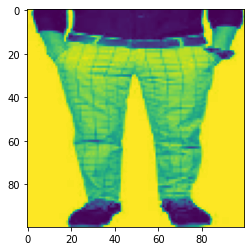

In [ ]:
img = plt.imshow((tf.squeeze(train_data[0])))

In [ ]:

from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Train on 57 samples, validate on 15 samples
Epoch 1/20
57/57 [==============================] - 5s 83ms/step - loss: 1.0723 - accuracy: 0.3684 - val_loss: 0.6965 - val_accuracy: 0.4667
Epoch 2/20
57/57 [==============================] - 5s 80ms/step - loss: 0.7027 - accuracy: 0.3684 - val_loss: 0.6931 - val_accuracy: 0.5333
Epoch 3/20
57/57 [==============================] - 5s 79ms/step - loss: 0.6937 - accuracy: 0.4737 - val_loss: 0.6936 - val_accuracy: 0.4000
Epoch 4/20
57/57 [==============================] - 4s 79ms/step - loss: 0.6915 - accuracy: 0.5614 - val_loss: 0.6934 - val_accuracy: 0.4000
Epoch 5/20
57/57 [==============================] - 4s 79ms/step - loss: 0.6864 - accuracy: 0.5789 - val_loss: 0.6907 - val_accuracy: 0.5333
Epoch 6/20
57/57 [==============================] - 5s 79ms/step - loss: 0.6762 - accuracy: 0.6140 - val_loss: 0.6814 - val_accuracy: 0.6000
Epoch 7/20
57/57 [==============================] - 5s 79ms/step - loss: 0.6571 - accuracy: 0.6842 - val_loss:

In [ ]:
yp = model.predict(test_data)

In [ ]:
np.argmax(yp[0])

1

In [ ]:
labels[np.argmax(yp[0])]

1